# Introduction to Computer Vision - Lab 04

## Task 1

Create two functions: one that performs forward propagation over the softmax (without the normalization layer included). The other that performs backward propagation over the softmax (without the normalization layer included).

These functions must be created for any number of labels C.

In [1]:
import numpy as np

In [2]:
class SoftMax:

    def __init__(self):
        self.y_hat = None  # output of forward propagation
        self.grad = None  # gradient with respect to the input values (result of backward propagation)

    def forward(self, g):
        # calculate output of the softmax function without normalization
        e_g = np.exp(g)
        self.y_hat = e_g / e_g.sum(axis=0)
        return self.y_hat

    def backward(self, g):
        # define the softmax gradient
        s_grad = np.zeros(g.shape[0])
        s_grad[np.argmax(g)] = 1
        
        # compute gradients
        y_hat_i_y_hat_j = self.y_hat * np.reshape(self.y_hat, (-1, 1))
        softmax_der = np.diag(self.y_hat) - y_hat_i_y_hat_j  # derivative of softmax
        self.grad = np.dot(softmax_der, s_grad)
        return self.grad

*The softmax derivative reference: [link](https://stats.stackexchange.com/a/328095)

Let's use an example from the lecture slides (Lecture 4 slide 52) and compare the results of my implementation with the manual calculations and torch results:



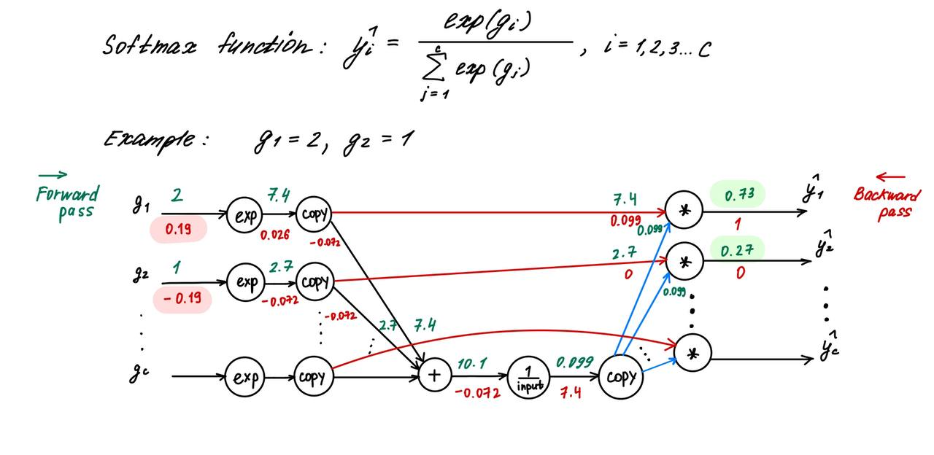

In [3]:
# try an example and compare my implementation with the torch results
print('Using numpy:')

softmax = SoftMax()
# define the values for g
g = np.array([2.0, 1.0])

# perform forward propagation over the softmax and display the result
forward_result = softmax.forward(g)
print(f'Forward propagation result: {forward_result}')

# perform backward propagation over the softmax and display the result
backward_result = softmax.backward(g)
print(f'Backward propagation result: {backward_result}')

# comparison with the torch results
print('\nUsing torch:')

import torch
import torch.nn.functional as F

# perform forward propagation over the softmax
g_tensor = torch.tensor(g, requires_grad=True)
forward_result_t = F.softmax(g_tensor, dim=0)
print(f'Forward propagation result: {forward_result_t.detach().numpy()}')

# define the upstream gradient
s_grad = np.zeros(g.shape[0])
s_grad[np.argmax(g)] = 1
s_grad_tensor = torch.tensor(s_grad)
# perform backward propagation
torch.autograd.backward(forward_result_t, s_grad_tensor)
backward_result_t = g_tensor.grad
print(f'Backward propagation result: {backward_result_t.detach().numpy()}')

Using numpy:
Forward propagation result: [0.73105858 0.26894142]
Backward propagation result: [ 0.19661193 -0.19661193]

Using torch:
Forward propagation result: [0.73105858 0.26894142]
Backward propagation result: [ 0.19661193 -0.19661193]


As it was obtained, the results are the same.

## Task 2

Create two functions: one that performs forward propagation over the softmax x with the normalization layer included. The other that performs backward propagation over the softmax with the normalization layer included.

These functions must be created for any number of labels C

In [4]:
class SoftMax_Normalization:

    def __init__(self):
        self.y_hat = None  # output of forward propagation
        self.grad = None  # gradient with respect to the input values (result of backward propagation)

    def forward(self, g):
        # calculate output of the softmax function with normalization
        e_g = np.exp(g - np.max(g))  # normalized
        self.y_hat = e_g / e_g.sum(axis=0)
        return self.y_hat

    def backward(self, g):
        # define the softmax gradient
        s_grad = np.zeros(g.shape[0])
        s_grad[np.argmax(g)] = 1
        
        # compute gradients
        y_hat_i_y_hat_j = self.y_hat * np.reshape(self.y_hat, (-1, 1))
        softmax_der = np.diag(self.y_hat) - y_hat_i_y_hat_j  # derivative of softmax
        self.grad = np.dot(softmax_der, s_grad)
        return self.grad

As can be seen, using the softmax without normalization, when we use very large values in *g*, the problem occurs:

In [5]:
# try an example with large g
print('Using numpy:')
print('Softmax without normalization:')

softmax = SoftMax()
g = np.array([167676767669.0, 167676767660.0])

# perform forward propagation over the softmax and display the result
forward_result = softmax.forward(g)
print(f'Forward propagation result: {forward_result}')

# perform backward propagation over the softmax and display the result
backward_result = softmax.backward(g)
print(f'Backward propagation result: {backward_result}')

Using numpy:
Softmax without normalization:
Forward propagation result: [nan nan]
Backward propagation result: [nan nan]


<ipython-input-2-36d6530e2ca3>:9: RuntimeWarning: overflow encountered in exp
  e_g = np.exp(g)
<ipython-input-2-36d6530e2ca3>:10: RuntimeWarning: invalid value encountered in divide
  self.y_hat = e_g / e_g.sum(axis=0)


Let's use the softmax with normalization included:

In [6]:
# try an example and compare my implementation with the torch results
print('Using numpy:')

softmax = SoftMax_Normalization()
# use large g
g = np.array([167676767660.0, 167676767669.0, 167676767466.0, 167676767500.0])

# perform forward propagation over the softmax and display the result
forward_result = softmax.forward(g)
print(f'Forward propagation result: {forward_result}')

# perform backward propagation over the softmax and display the result
backward_result = softmax.backward(g)
print(f'Backward propagation result: {backward_result}')

# comparison with the torch results
print('\nUsing torch:')

import torch
import torch.nn.functional as F

# perform forward propagation over the softmax
g_tensor = torch.tensor(g, requires_grad=True)
forward_result_t = F.softmax(g_tensor, dim=0)
print(f'Forward propagation result: {forward_result_t.detach().numpy()}')

# perform backward propagation
# define softmax gradient
s_grad = np.zeros(g.shape[0])
s_grad[np.argmax(g)] = 1
s_grad_tensor = torch.tensor(s_grad)
torch.autograd.backward(forward_result_t, s_grad_tensor)
backward_result_t = g_tensor.grad
print(f'Backward propagation result: {backward_result_t.detach().numpy()}')

Using numpy:
Forward propagation result: [1.23394576e-04 9.99876605e-01 6.88916491e-89 4.01956416e-74]
Backward propagation result: [-1.23379350e-04  1.23379350e-04 -6.88831482e-89 -4.01906817e-74]

Using torch:
Forward propagation result: [1.23394576e-04 9.99876605e-01 6.88916491e-89 4.01956416e-74]
Backward propagation result: [-1.23379350e-04  1.23379350e-04 -6.88831482e-89 -4.01906817e-74]
